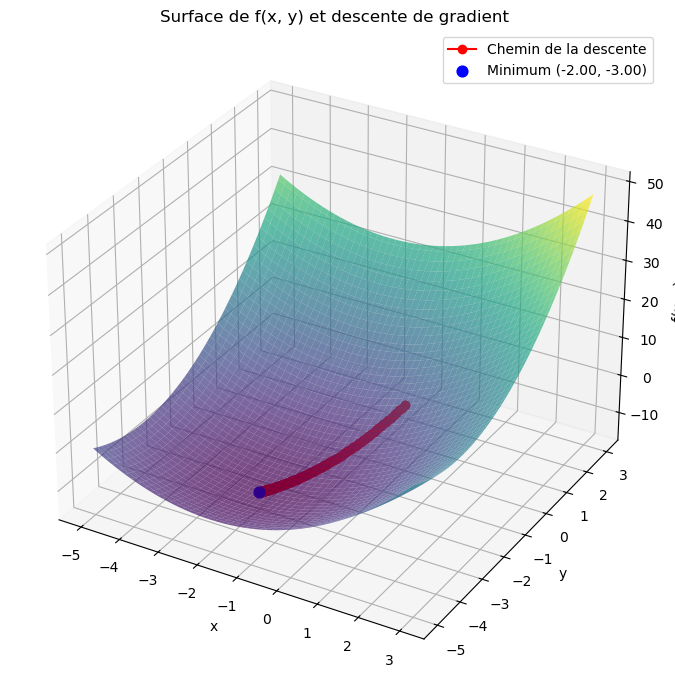

In [53]:
# -----------------------------------------------
# Descente de gradient avec activation d’un seul critère d’arrêt à la fois
# f(x, y) = x² + y² + 4x + 6y
# -----------------------------------------------

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math

# 1. Fonction à minimiser
def f(x, y):
    return x**2 + y**2 + 4*x + 6*y

# 2. Gradient de la fonction
def gradient(x, y):
    return (2*x + 4, 2*y + 6)

# 3. Paramètres
x = 0.0
y = 0.0
alpha = 0.01
epsilon = 1e-5
max_iterations = 500

history = [(0, x, y, f(x, y))]

print("Itération 0 :")
print(f"   (x, y) = ({x:.6f}, {y:.6f})")
print(f"   f(x, y) = {f(x, y):.6f}")
print("-" * 50)

# 4. Boucle principale
for k in range(1, max_iterations + 1):
    
    x_old, y_old = x, y
    f_old = f(x_old, y_old)

    # Mise à jour des variables
    x = x - alpha * grad_x
    y = y - alpha * grad_y
    grad_x, grad_y = gradient(x, y)
    f_new = f(x, y)
    history.append((k, x, y, f_new))

    # print(f"Itération {k} :")
    # print(f"   Gradient = ({grad_x:.6f}, {grad_y:.6f})")
    # print(f"   (x, y) = ({x:.6f}, {y:.6f})")
    # print(f"   f(x, y) = {f_new:.6f}")

    # -----------------------------------------------
    # ❗ Choisir un seul critère d'arrêt à activer à la fois :
    #    (décommenter uniquement le bloc souhaité)
    # -----------------------------------------------

    # --- Critère (a) : norme du gradient ---
    # grad_norm = math.sqrt(grad_x**2 + grad_y**2)
    # if grad_norm < epsilon:
    #     print("✅ Arrêt : norme du gradient < epsilon")
    #     break

    # --- Critère (b) : variation des paramètres ---
    # delta_x = abs(x - x_old)
    # delta_y = abs(y - y_old)
    # if delta_x < epsilon and delta_y < epsilon:
    #     print("✅ Arrêt : variation des paramètres < epsilon")
    #     break

    # --- Critère (c) : max_iterations ---
    # (Déjà pris en compte automatiquement par la boucle for)

    # --- Critère (d) : variation de la fonction ---
    # delta_f = abs(f_new - f_old)
    # if delta_f < epsilon:
    #     print("✅ Arrêt : variation de la fonction < epsilon")
    #     break

    # print("-" * 50)

# # 5. Résumé des résultats
print("\nRésumé final :")
print("{:<10} {:<22} {:<15}".format("Itération", "(x, y)", "f(x, y)"))
for k, xk, yk, val in history:
    print("{:<10} ({:<9.6f}, {:<9.6f}) {:<10.6f}".format(k, xk, yk, val))

# 6. Courbes de niveau (2D)
x_vals = [xk for _, xk, _, _ in history]
y_vals = [yk for _, _, yk, _ in history]
f_vals = [val for _, _, _, val in history]

x_range = np.linspace(-5, 3, 100)
y_range = np.linspace(-5, 3, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y)

plt.figure(figsize=(8, 6))
contours = plt.contour(X, Y, Z, levels=20, cmap='coolwarm')
plt.plot(x_vals, y_vals, 'ro-', label='Chemin de la descente')
plt.plot(x_vals[-1], y_vals[-1], 'bo', label=f"Minimum ({x_vals[-1]:.2f}, {y_vals[-1]:.2f})")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Courbes de niveau de f(x, y) avec chemin de descente")
plt.colorbar(contours)
plt.legend()
plt.axis("equal")
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Surface 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
ax.plot(x_vals, y_vals, f_vals, 'ro-', label='Chemin de la descente')
ax.scatter(x_vals[-1], y_vals[-1], f_vals[-1], color='blue', s=60, label=f"Minimum ({x_vals[-1]:.2f}, {y_vals[-1]:.2f})")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.set_title("Surface de f(x, y) et descente de gradient")
ax.legend()
plt.tight_layout()
plt.show()
